### Intro to concepts

https://scipy-lectures.org/packages/scikit-image/index.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np

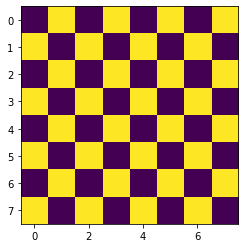

In [2]:
check = np.zeros((8, 8))
check[::2, 1::2] = 1
check[1::2, ::2] = 1

plt.imshow(check) #display data as image

In [3]:
import skimage
from skimage import data  # most functions are in subpackages
#Most scikit-image functions take NumPy ndarrays as arguments
from skimage import filters

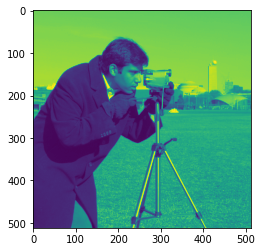

In [5]:
data.camera() #esta en formato de numpy array
camera=data.camera()
type(camera) #numpy.ndarray
camera.dtype #dtype('uint8')

plt.imshow(camera)

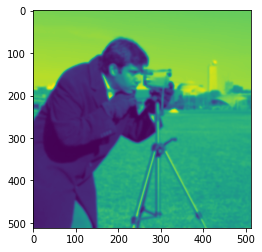

In [26]:
filtered_camera = filters.gaussian(camera, sigma=2)
plt.imshow(filtered_camera) #blur image

### Import and output images

In [8]:
from skimage import io
import os

(140, 568, 3)

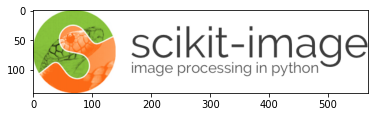

In [46]:
#importar de url
logo = io.imread('http://scikit-image.org/_static/img/logo.png')
plt.imshow(logo)
logo.shape #rgb

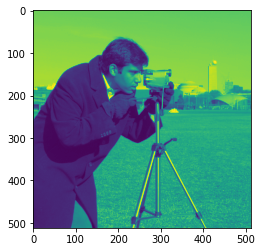

In [11]:
#importar
filename = os.path.join(skimage.data_dir, 'camera.png')

#hacer que se pueda leer
camera = io.imread(filename)

#print
plt.imshow(camera)

In [12]:
#save image
io.imsave('local_logo.png', logo)

### Filter and multiply

255

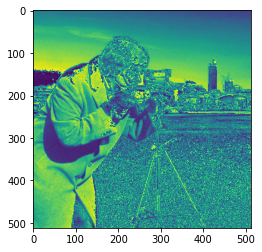

In [18]:
camera_multiply=7*camera
plt.imshow(camera_multiply)
camera.shape #512*512
camera.dtype #dtype('uint8') 8 bit unsigned integer
#unsigned, only positive


In [19]:
#turn image into float
from skimage import img_as_float


In [39]:
camera_float = img_as_float(camera)
print(camera.max(), camera_float.max())
print(camera.min(), camera_float.min())
#https://scikit-image.org/docs/stable/user_guide/data_types.html


255 1.0
0 0.0


0.6447887988758096 0.7686274509803921 0.834313725490196


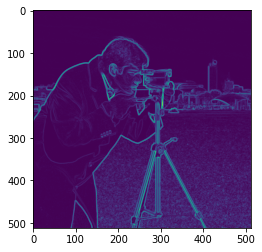

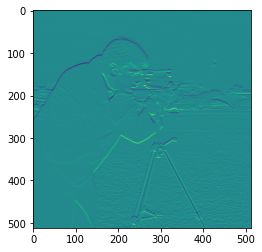

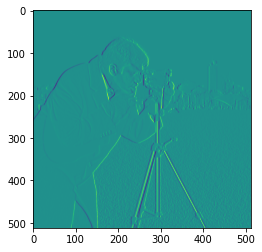

In [38]:
camera_sobel = filters.sobel(camera)
camera_sobelh = filters.sobel_h(camera)
camera_sobelv = filters.sobel_v(camera)
print(camera_sobel.max(),camera_sobelh.max(),camera_sobelv.max())
plt.imshow(camera_sobel)
plt.show()
plt.imshow(camera_sobelh)
plt.show()
plt.imshow(camera_sobelv)
plt.show()


### RGB pictures

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ...,
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ...,
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        ...,
        [117, 126,  71],
        [133, 142,  87],
        [144, 153,  98]],

       ...,

       [[ 87, 106,  76],
        [ 94, 110,  81],
        [107, 124,  92],
        ...,
        [120, 158,  97],
        [119, 157,  96],
        [119, 158,  95]],

       [[ 85, 101,  72],
        [ 95, 111,  82],
        [112, 127,  96],
        ...,
        [121, 157,  96],
        [120, 156,  94],
        [120, 156,  94]],

       [[ 85, 101,  74],
        [ 97, 113,  84],
        [111, 126,  97],
        ...,
        [120, 156,  95],
        [119, 155,  93],
        [118, 154,  92]]

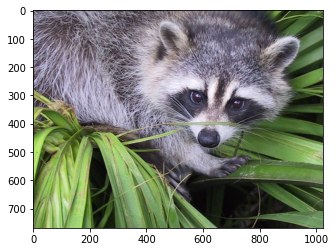

In [44]:
import scipy
face = scipy.misc.face()
face.shape #(768, 1024, 3)
plt.imshow(face)
face

### Local Filters

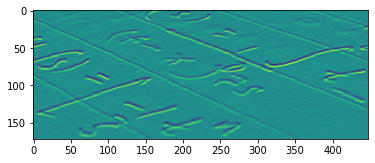

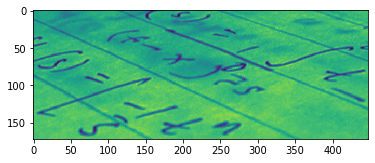

In [49]:
text = data.text()
hsobel_text = filters.sobel_h(text)
plt.imshow(hsobel_text)
plt.show()
plt.imshow(text)

### Non Local filters

In [50]:
from skimage import exposure

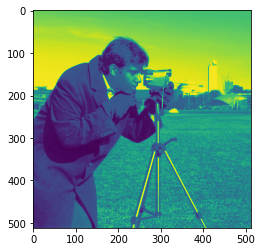

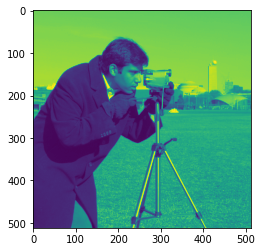

In [53]:
camera_equalized = exposure.equalize_hist(camera)
plt.imshow(camera_equalized)
plt.show()
plt.imshow(camera)